In [26]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df = pd.read_csv('drive/MyDrive/Data_Viz/video_games_sales.csv')

In [29]:
print("my data shapes ", df.shape)

my data shapes  (16719, 16)


In [30]:
print(df.head)

<bound method NDFrame.head of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

         

In [43]:
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [ ]:
print(df.dtypes)

In [95]:
df.isna().sum()

Name                 0
Platform             0
Year_of_Release    127
Genre                0
Publisher            6
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       573
Critic_Count       573
User_Score           0
User_Count           0
Developer           11
Rating              86
dtype: int64

In [116]:
df = df.dropna()

In [117]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [118]:
df[df.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [119]:
df[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
507,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.15,0.0,0.17,2.86,81.0,36.0,5.8,179.0,EA Tiburon,E
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
5887,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.28,0.00,0.0,0.02,0.30,63.0,6.0,7.3,38.0,EA Tiburon,E
7067,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.21,0.00,0.0,0.02,0.23,75.0,9.0,6.7,30.0,EA Tiburon,E
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


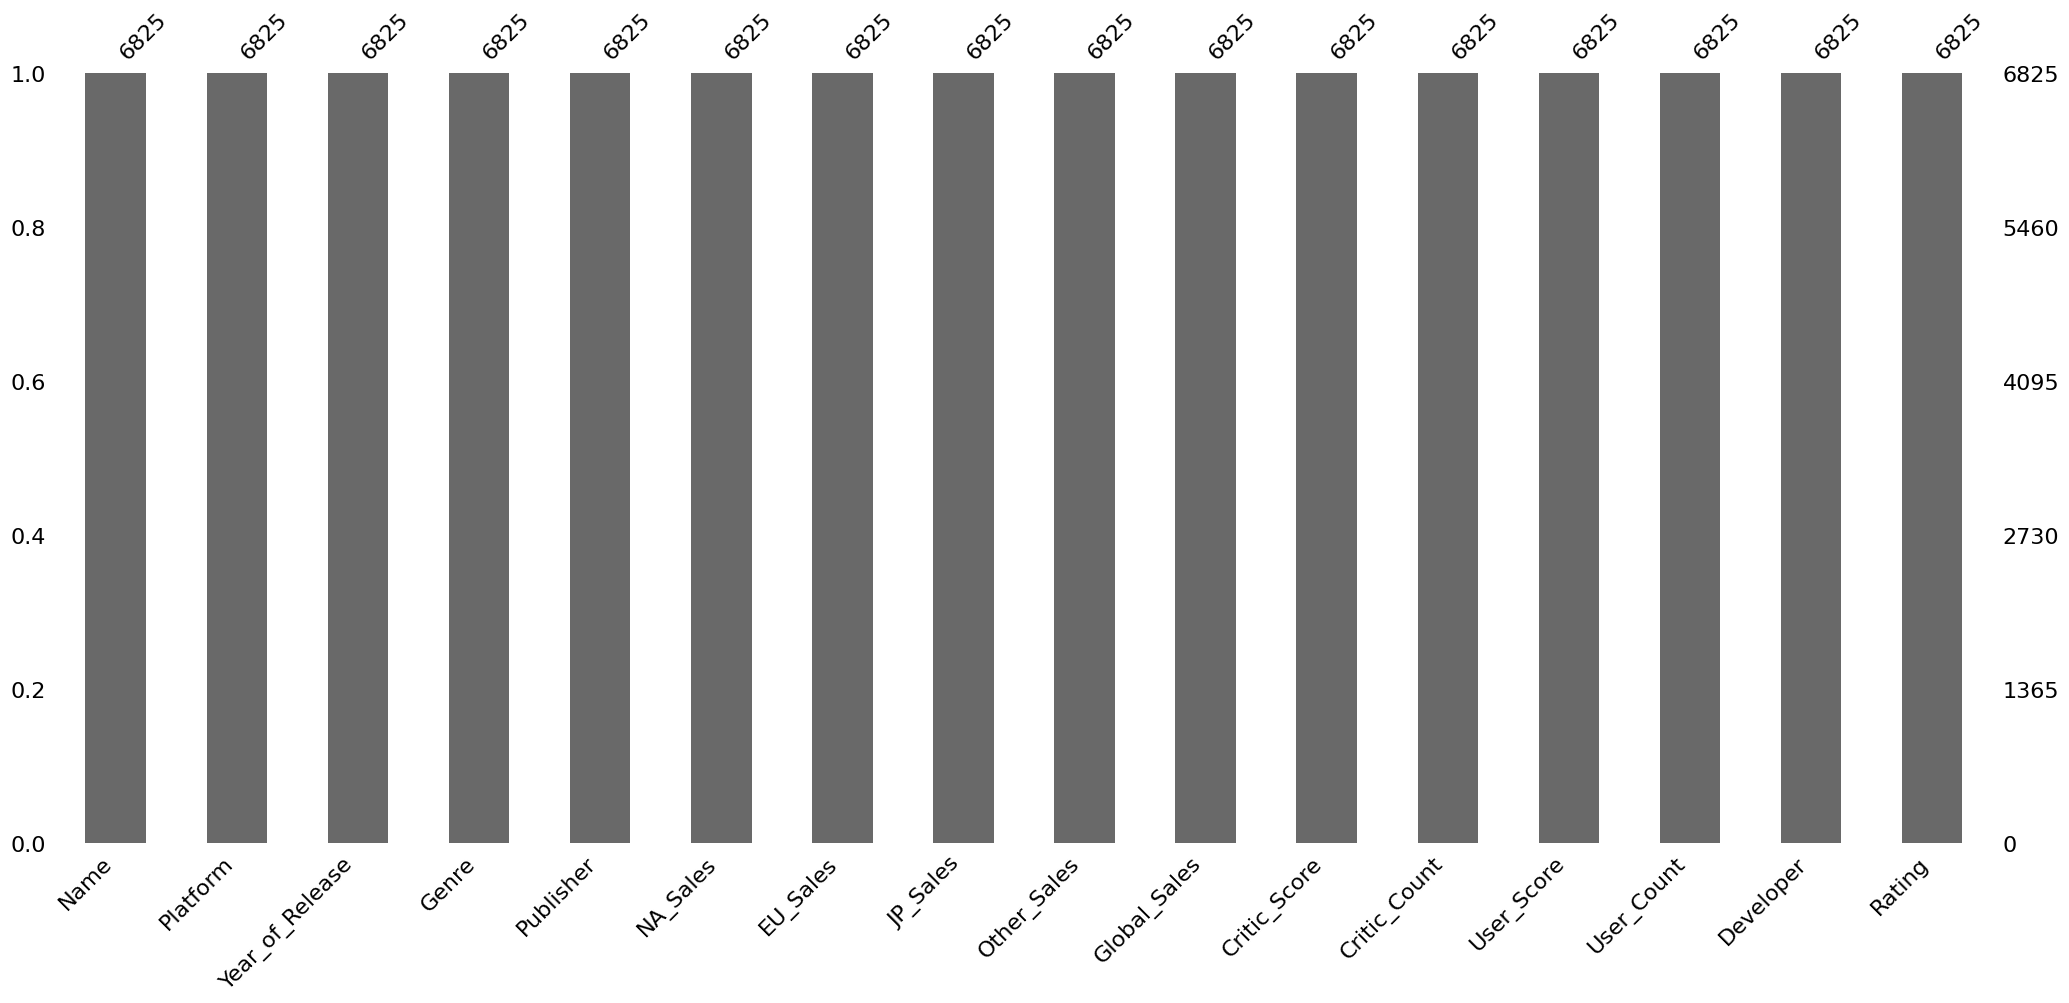

In [120]:
missingno.bar(df)
plt.show()

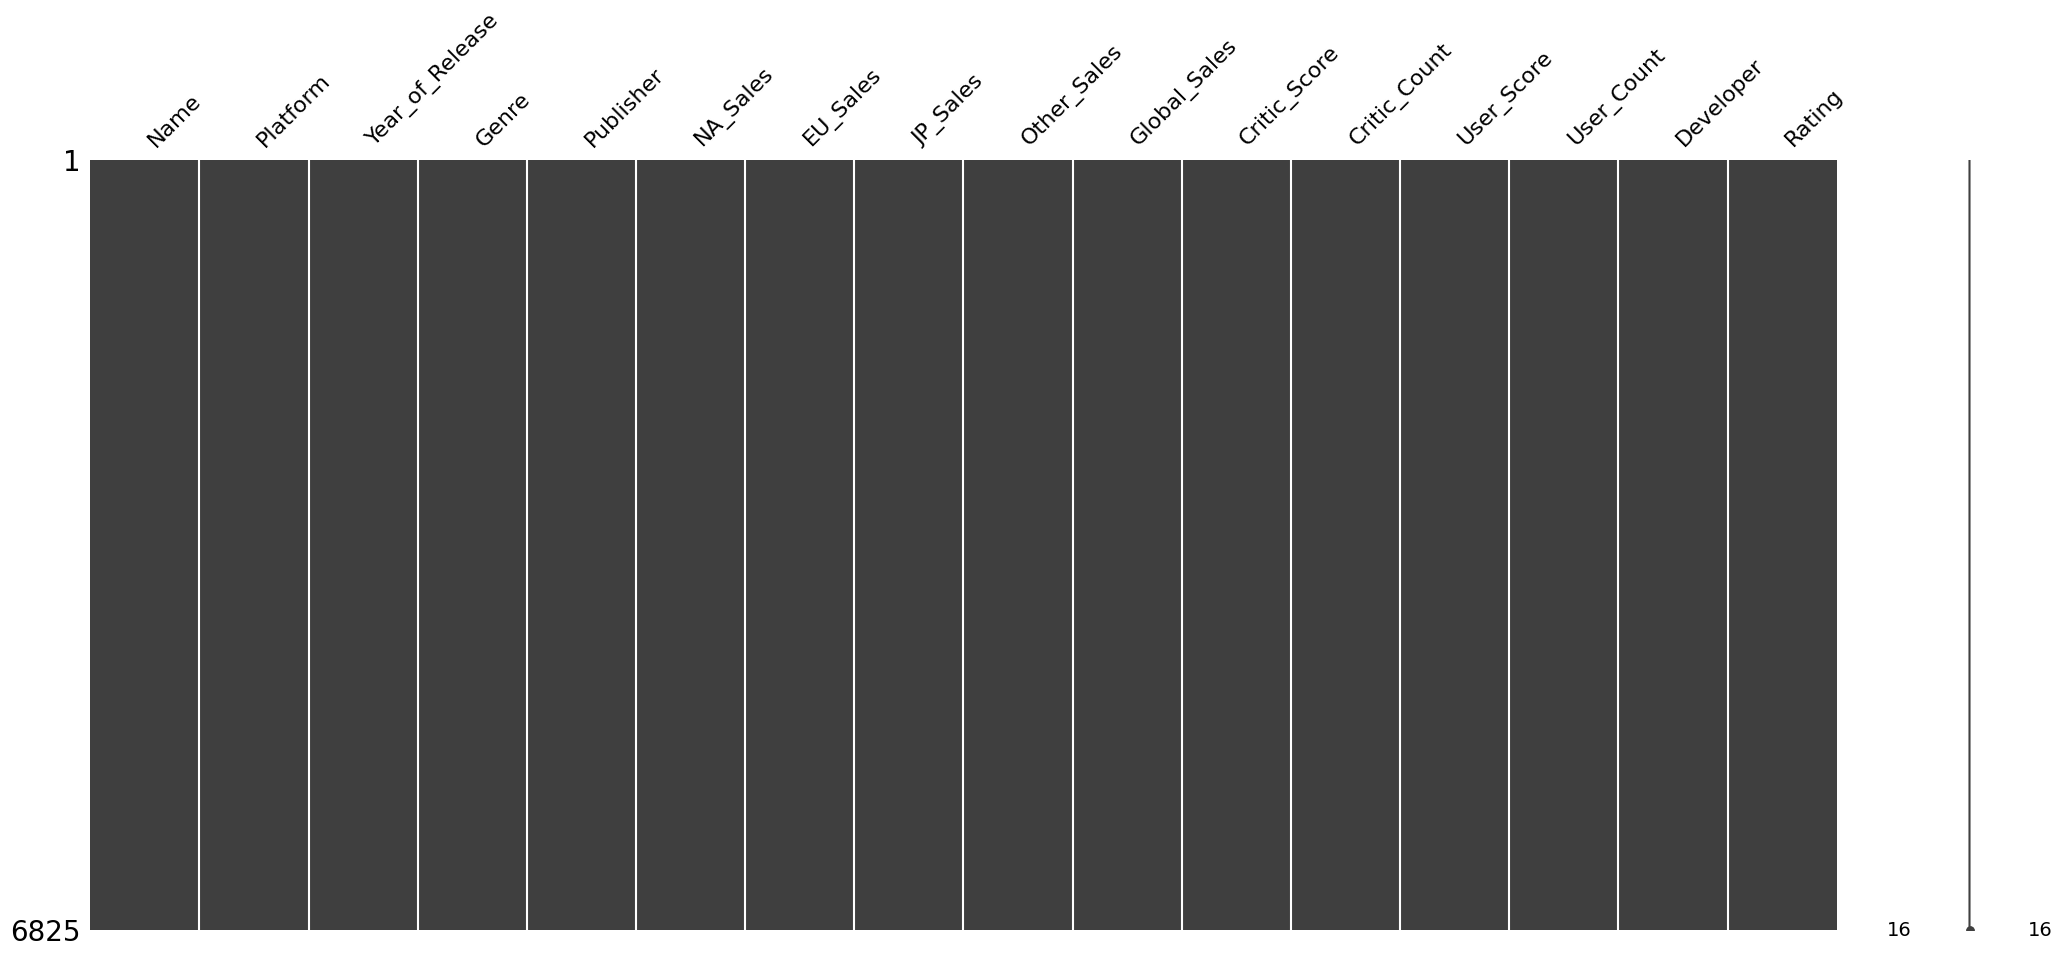

In [121]:
missingno.matrix(df)
plt.show()

In [124]:
num_cols = df.dtypes[df.dtypes != "O"].index.tolist()

In [125]:
num_cols

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Count']

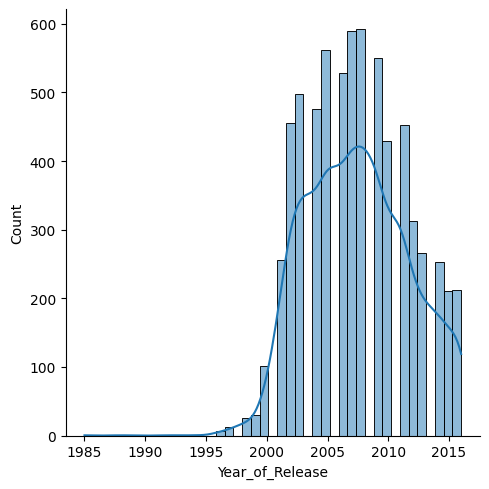

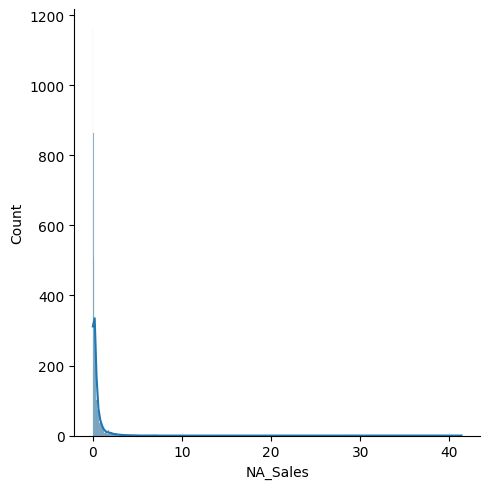

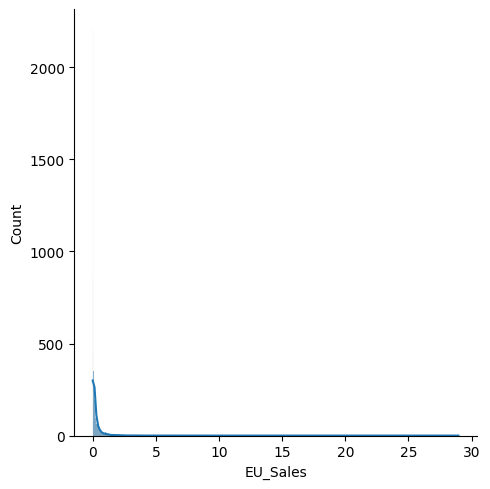

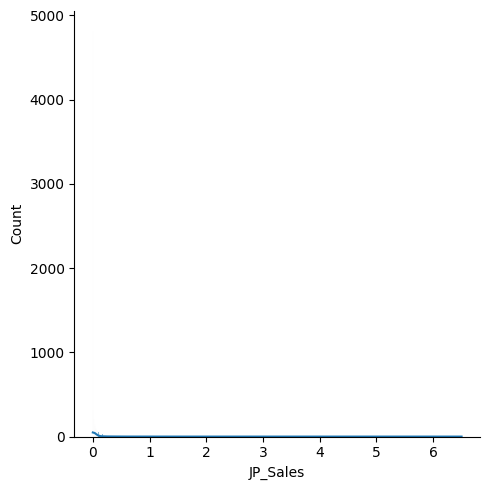

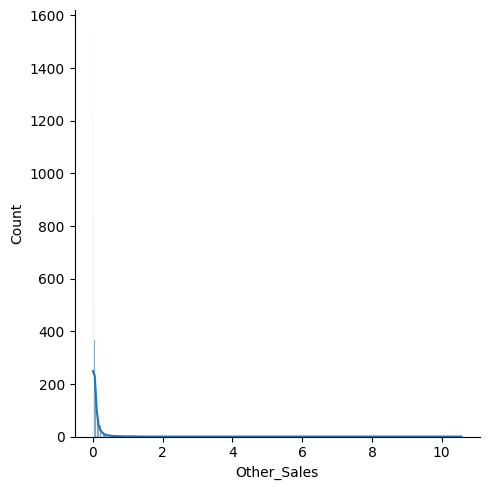

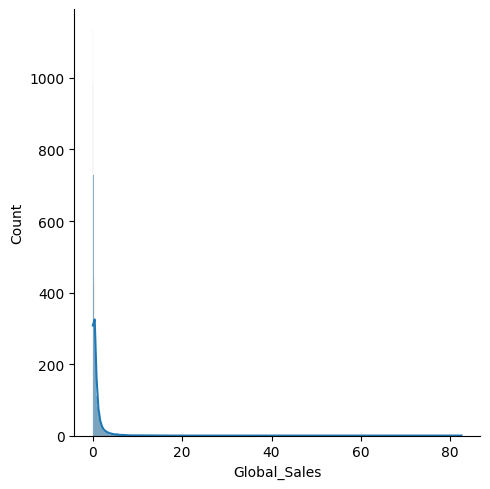

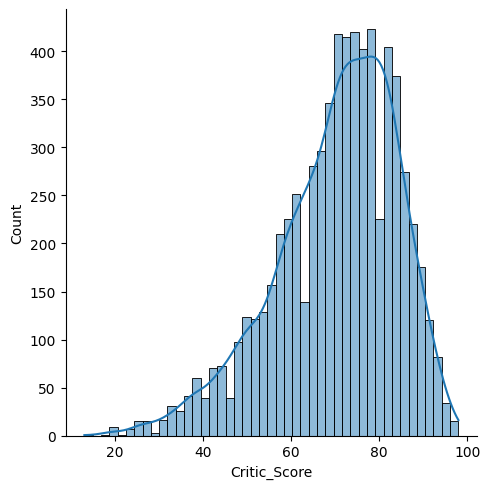

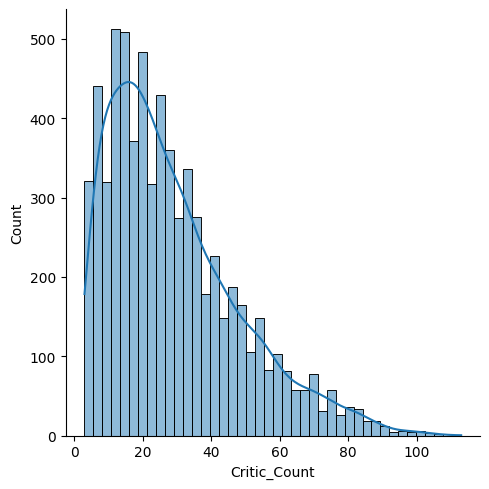

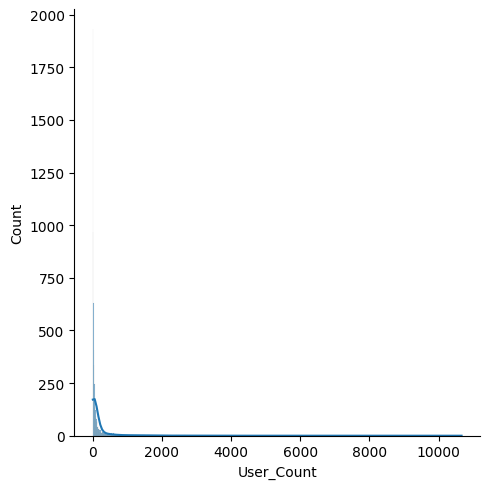

In [126]:
for num_col in num_cols:
  sns.displot(df[num_col], kde=True)
  plt.show()

In [127]:
df.sort_values(by='User_Count', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2851,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,Namco Bandai Games,0.21,0.46,0.00,0.05,0.72,93.0,32.0,9.3,10665.0,CD Projekt Red Studio,M
303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M
11288,Counter-Strike: Source,PC,2004.0,Shooter,Vivendi Games,0.00,0.07,0.00,0.02,0.08,88.0,9.0,8.9,9851.0,Valve Software,M
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.00,0.54,5.14,88.0,86.0,4,9629.0,Blizzard Entertainment,M
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.16,2.12,0.00,0.60,3.88,94.0,32.0,8.1,9073.0,Bethesda Game Studios,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8701,Chaotic: Shadow Warriors,X360,2009.0,Action,Activision,0.14,0.00,0.00,0.01,0.16,60.0,4.0,5,4.0,FUN Labs,E10+
13239,Whirl Tour,GC,2002.0,Sports,Vivendi Games,0.04,0.01,0.00,0.00,0.05,61.0,10.0,9,4.0,Papaya Studios,E
7707,NHL FaceOff 2001,PS2,2001.0,Sports,Sony Computer Entertainment,0.10,0.07,0.00,0.02,0.20,57.0,11.0,4,4.0,989 Sports,E
489,Pac-Man Collection,GBA,2001.0,Puzzle,Atari,2.07,0.77,0.05,0.05,2.94,79.0,13.0,7.8,4.0,Mass Media,E


In [135]:
df['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [147]:
top_publishers = df['Publisher'].value_counts().head(20).index.tolist()

In [148]:
top_publishers

['Electronic Arts',
 'Ubisoft',
 'Activision',
 'Sony Computer Entertainment',
 'THQ',
 'Nintendo',
 'Sega',
 'Take-Two Interactive',
 'Konami Digital Entertainment',
 'Namco Bandai Games',
 'Capcom',
 'Atari',
 'Microsoft Game Studios',
 'Tecmo Koei',
 'Square Enix',
 'Warner Bros. Interactive Entertainment',
 'Eidos Interactive',
 'Vivendi Games',
 'Codemasters',
 'Midway Games']

In [140]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [161]:
rating_by_user_count = df.groupby(by='Publisher')['User_Count'].mean()[top_publishers]


In [162]:
rating_by_user_count = rating_by_user_count.sort_values(ascending=False)

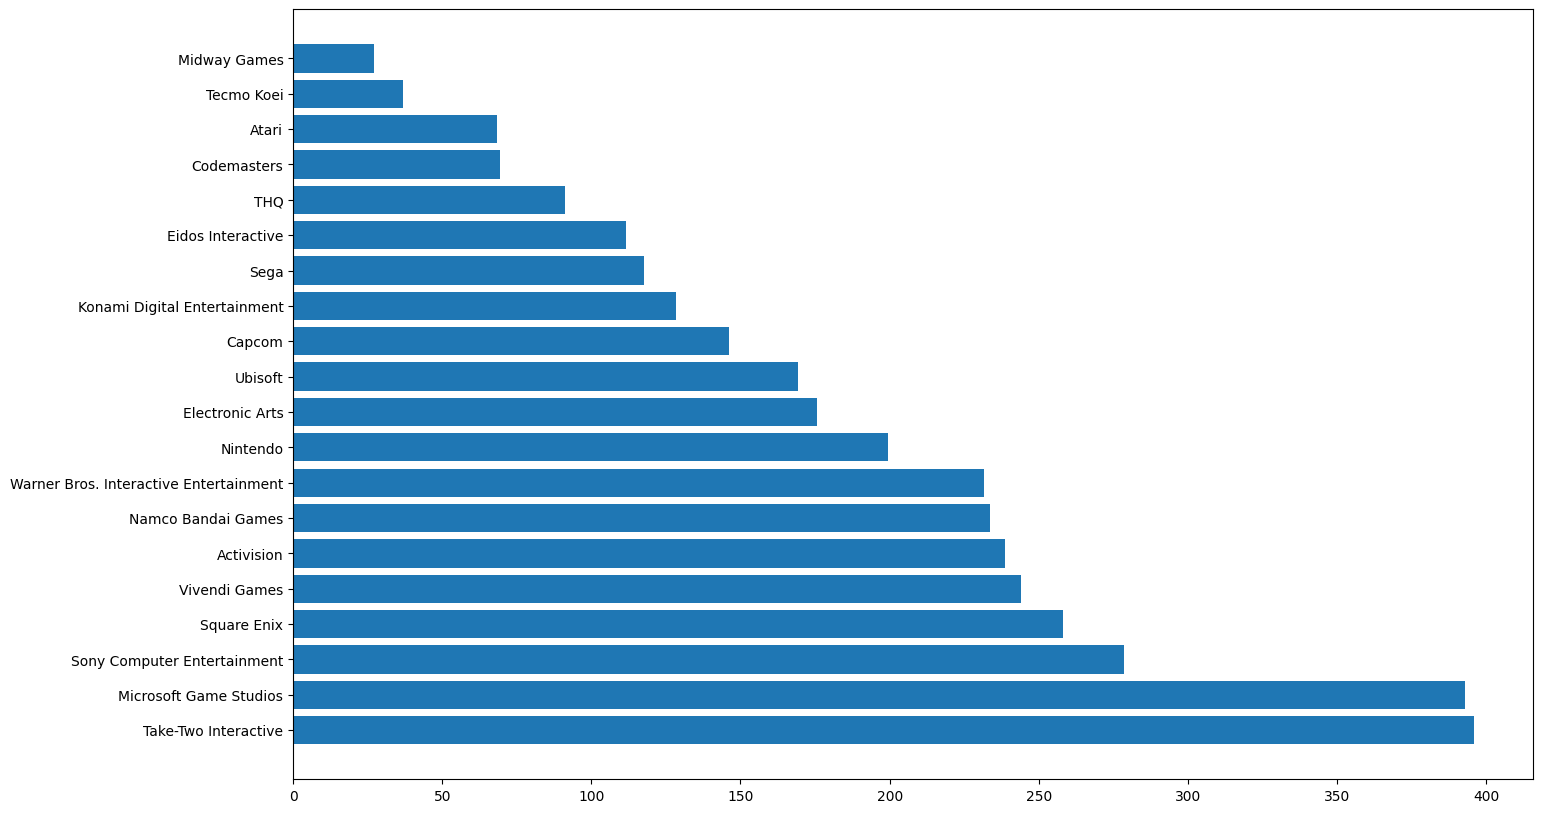

In [163]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_user_count.index, width=rating_by_user_count.values)

plt.show()

In [164]:
rating_by_publisher = df.groupby(by='Publisher')['Critic_Score'].mean()[top_publishers]
rating_by_publisher = rating_by_publisher.sort_values(ascending=False)

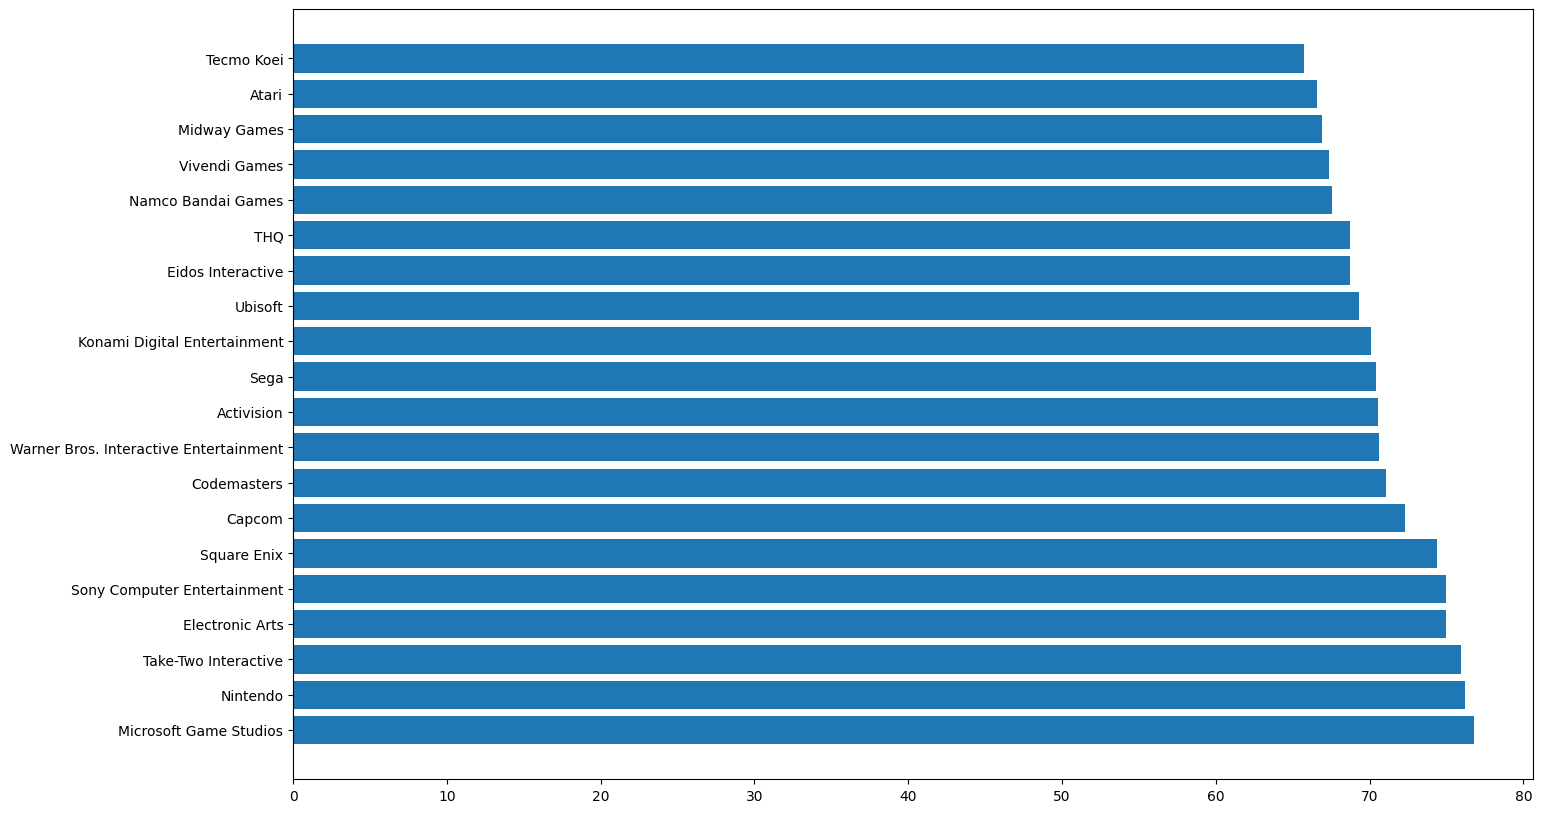

In [165]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_publisher.index, width=rating_by_publisher.values)

plt.show()

In [176]:
favorite_publisher = 'Paradox Interactive'

In [179]:
df_favorite = df[df['Publisher'] == favorite_publisher]
print(df_favorite.shape)

(13, 16)


In [180]:
df_favorite.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [183]:
df_favorite['Critic_Score'].mean()

70.53846153846153

In [186]:
rating_by_genres = df.groupby(by='Genre')['User_Count'].mean()
rating_by_genres = rating_by_genres.sort_values(ascending=False)
print(rating_by_genres)

Genre
Shooter         392.393519
Role-Playing    331.209270
Strategy        218.101124
Action          202.201840
Adventure       114.770161
Platform        114.590571
Simulation       92.771044
Racing           73.750430
Fighting         66.544974
Sports           45.281018
Puzzle           34.457627
Misc             33.447917
Name: User_Count, dtype: float64


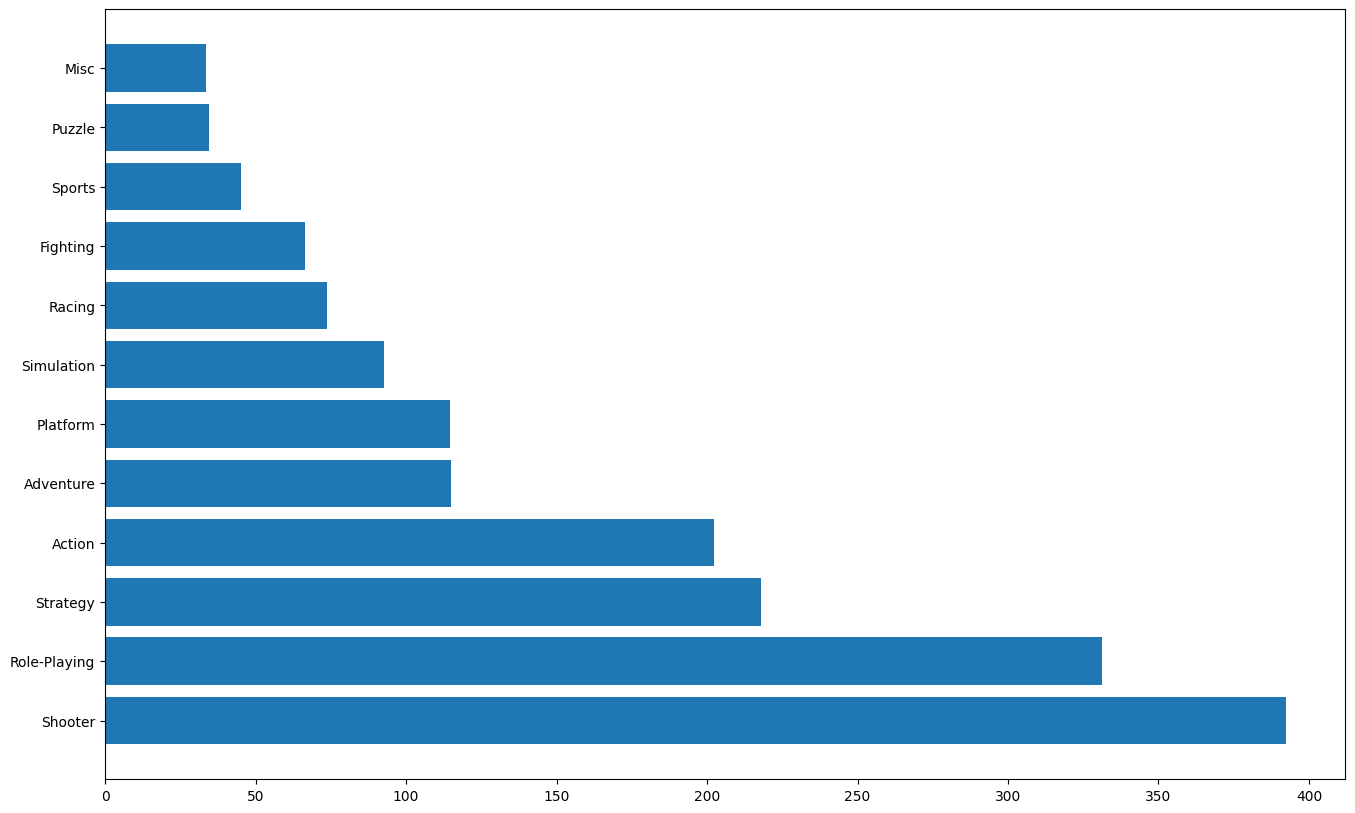

In [189]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_genres.index, width=rating_by_genres.values)

plt.show()

In [191]:
global_user_mean = df['User_Count'].mean()

In [193]:
global_user_mean

174.72234432234433

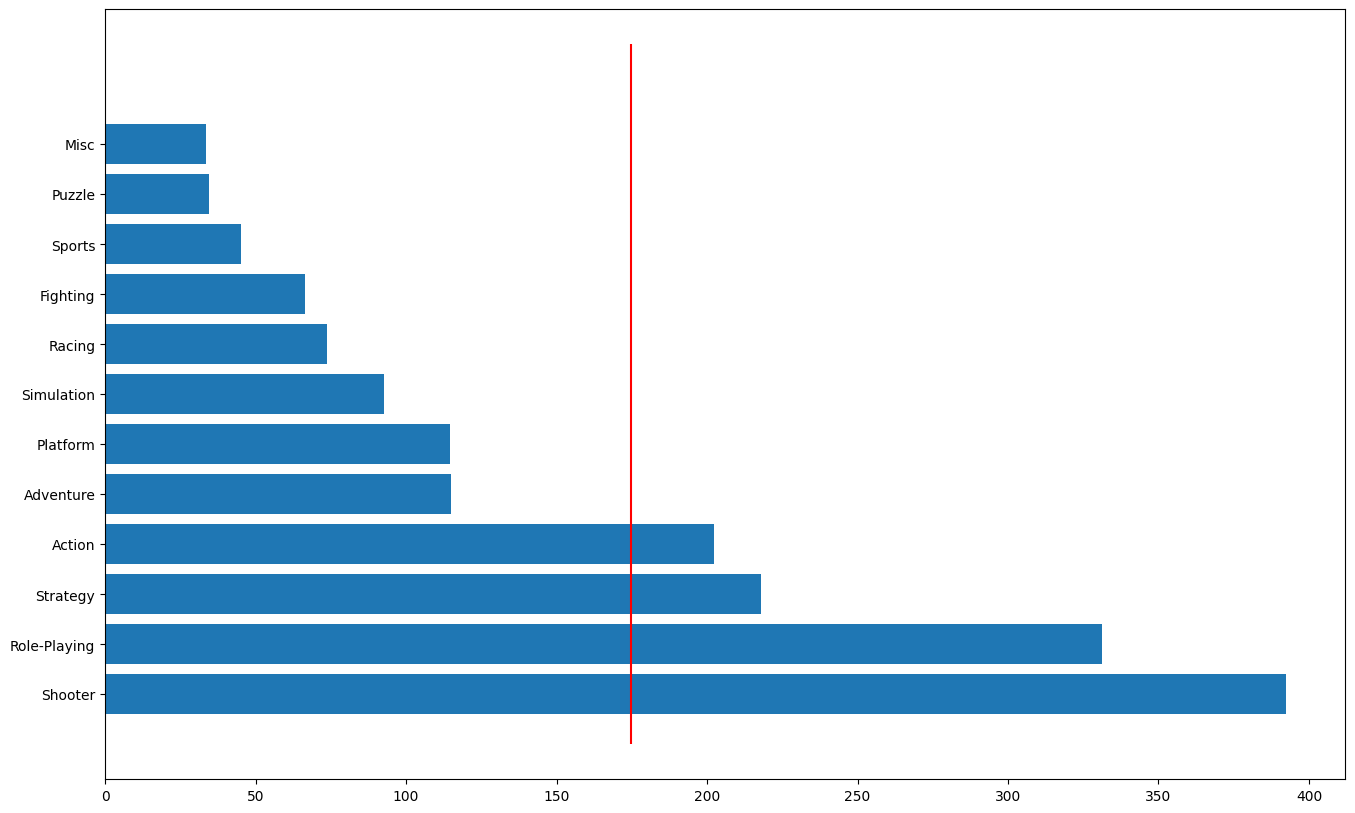

In [196]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_genres.index, width=rating_by_genres.values)
ax.vlines(global_user_mean,  ymin=-1, ymax=rating_by_genres.shape[0]+1, colors = 'red')

plt.show()